In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Handling Missing Values

In [6]:
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'workclass': ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
Unique values in 'education': ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
Unique values in 'marital.status': ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
Unique values in 'occupation': ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Unique values in 'relationship': ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
Unique values in 'race': ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
Unique values in 'sex': [

In [7]:
col_has_missing = (df == '?').any()
col_has_missing[col_has_missing]

workclass         True
occupation        True
native.country    True
dtype: bool

In [8]:
df.replace('?', np.nan, inplace=True)

In [9]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0]

workclass         1836
occupation        1843
native.country     583
dtype: int64

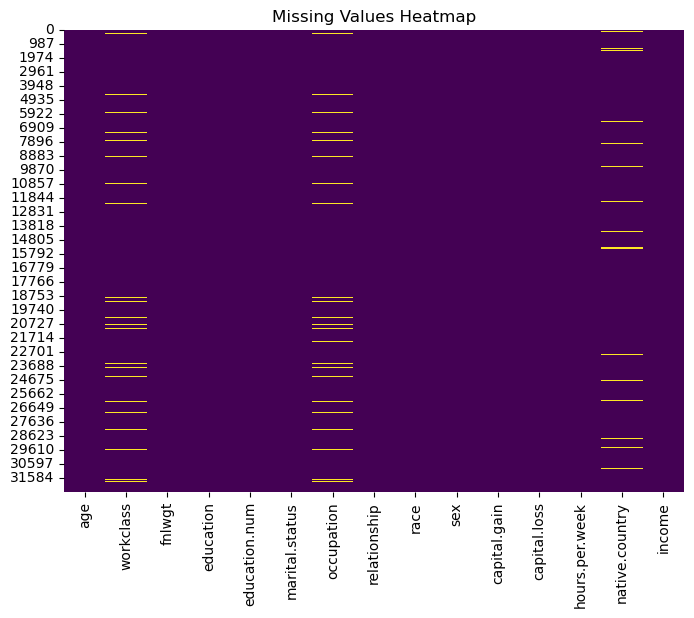

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [11]:
df = df.dropna()
df.shape

(30162, 15)

# Removing Duplicate Values

In [12]:
df.duplicated().sum()

23

In [13]:
df = df.drop_duplicates(keep='first')
df.shape

(30139, 15)

fnlwgt is dropped because it represents the weighting of each individual's record in the dataset, which is not useful for determining the income.

In [14]:
df.drop(columns="fnlwgt", inplace=True)
df.shape

(30139, 14)

# Outlier Removal

In [15]:
numeric_columns = df.select_dtypes(include='number').columns
numeric_columns

Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

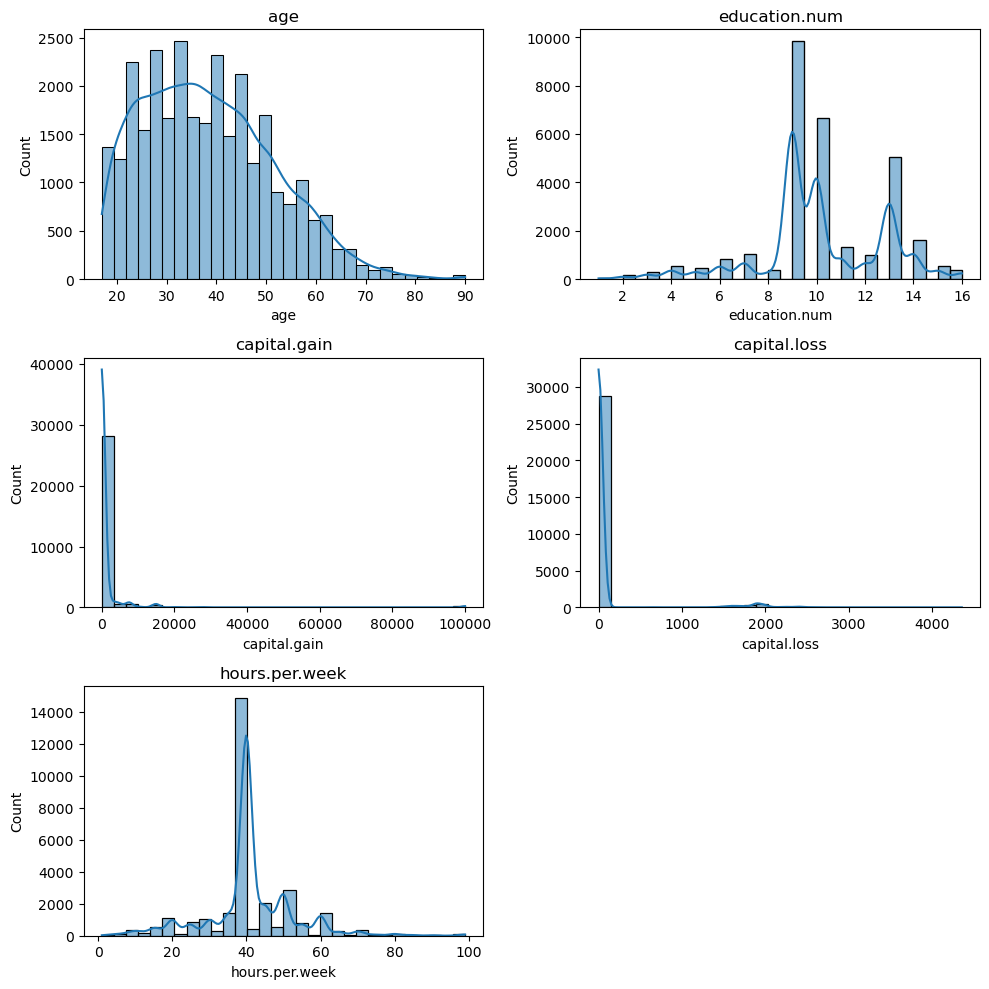

In [16]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(numeric_columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
    plt.tight_layout()
plt.show()

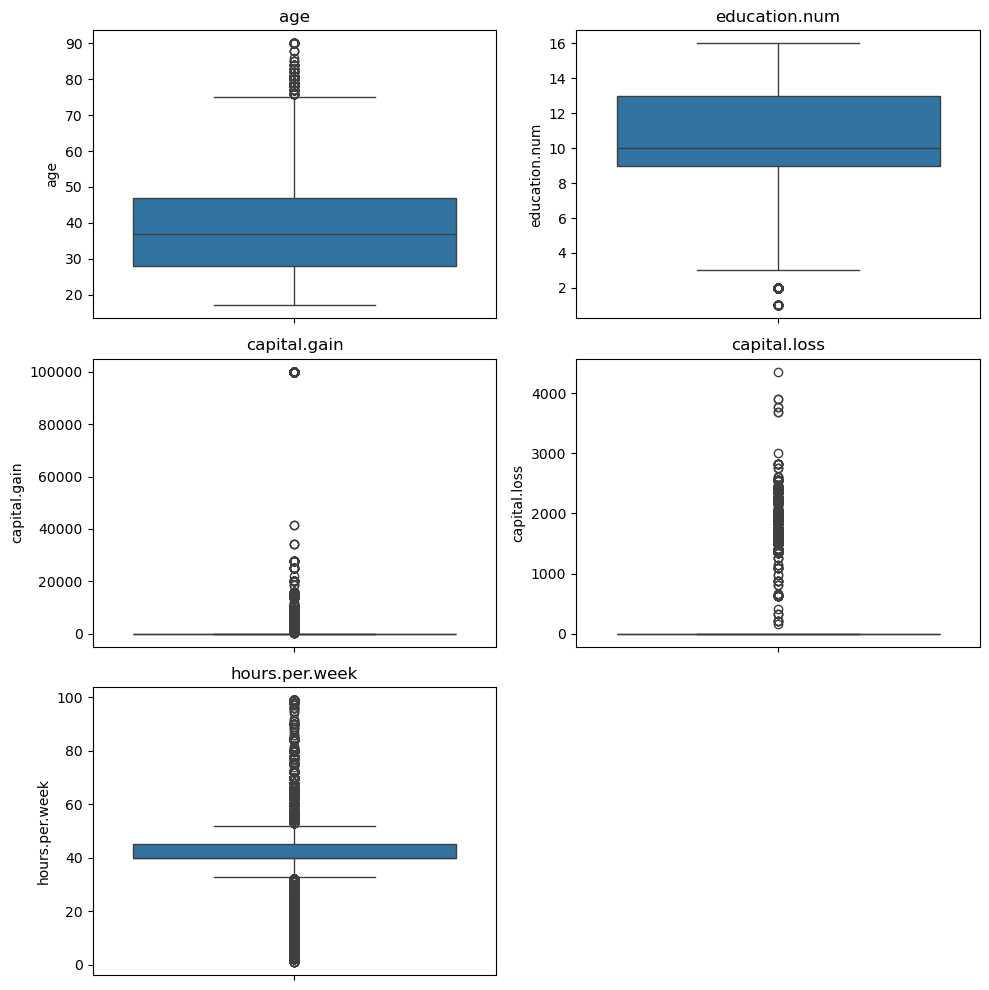

In [17]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(numeric_columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(df[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

<Axes: xlabel='capital.gain'>

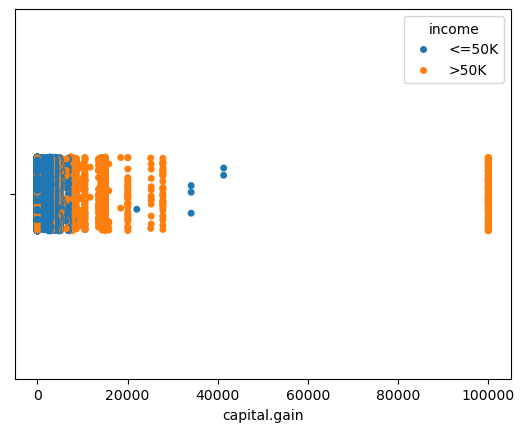

In [18]:
sns.stripplot(data=df, x="capital.gain", hue="income", jitter=True)

<Axes: xlabel='capital.loss'>

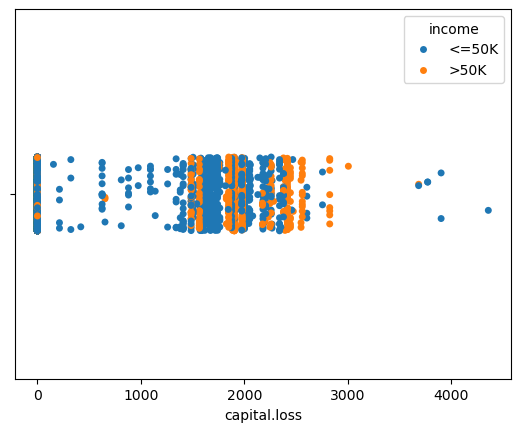

In [19]:
sns.stripplot(data=df, x="capital.loss", hue="income", jitter=True)

In [20]:
# Remove capital.gain values above 30,000 or capital.loss values above 3000

df = df[(df["capital.gain"] <= 30_000) & (df["capital.loss"] <= 3_000)]
df.shape

(29978, 14)

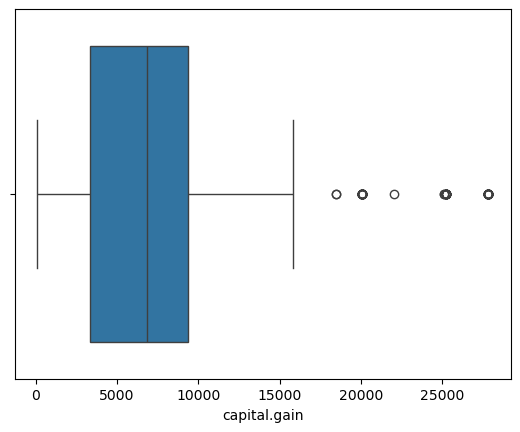

In [21]:
sns.boxplot(x=df[df["capital.gain"] > 0]["capital.gain"])
plt.show()

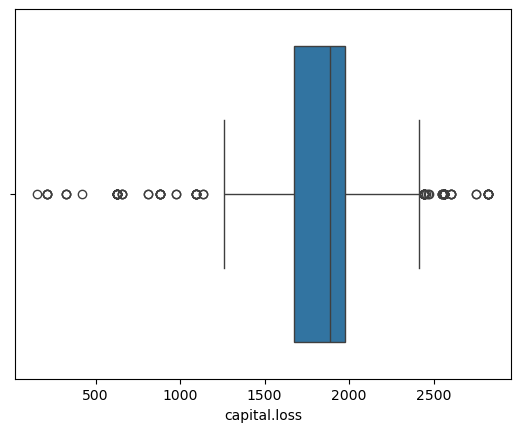

In [22]:
sns.boxplot(x=df[df["capital.loss"] > 0]["capital.loss"])
plt.show()

In [23]:
# Calculate skew and sort
skew_feats = df[
    numeric_columns.drop(labels=["capital.gain", "capital.loss"])
].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_feats})
skewness

,Skew
age,0.532412
hours.per.week,0.332183
education.num,-0.308876


In [24]:
skew_capital_feats = df[(df["capital.gain"] > 0) | (df["capital.loss"] > 0)][["capital.gain", "capital.loss"]].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_capital_feats})
skewness

,Skew
capital.gain,1.447249
capital.loss,0.654800


# EDA

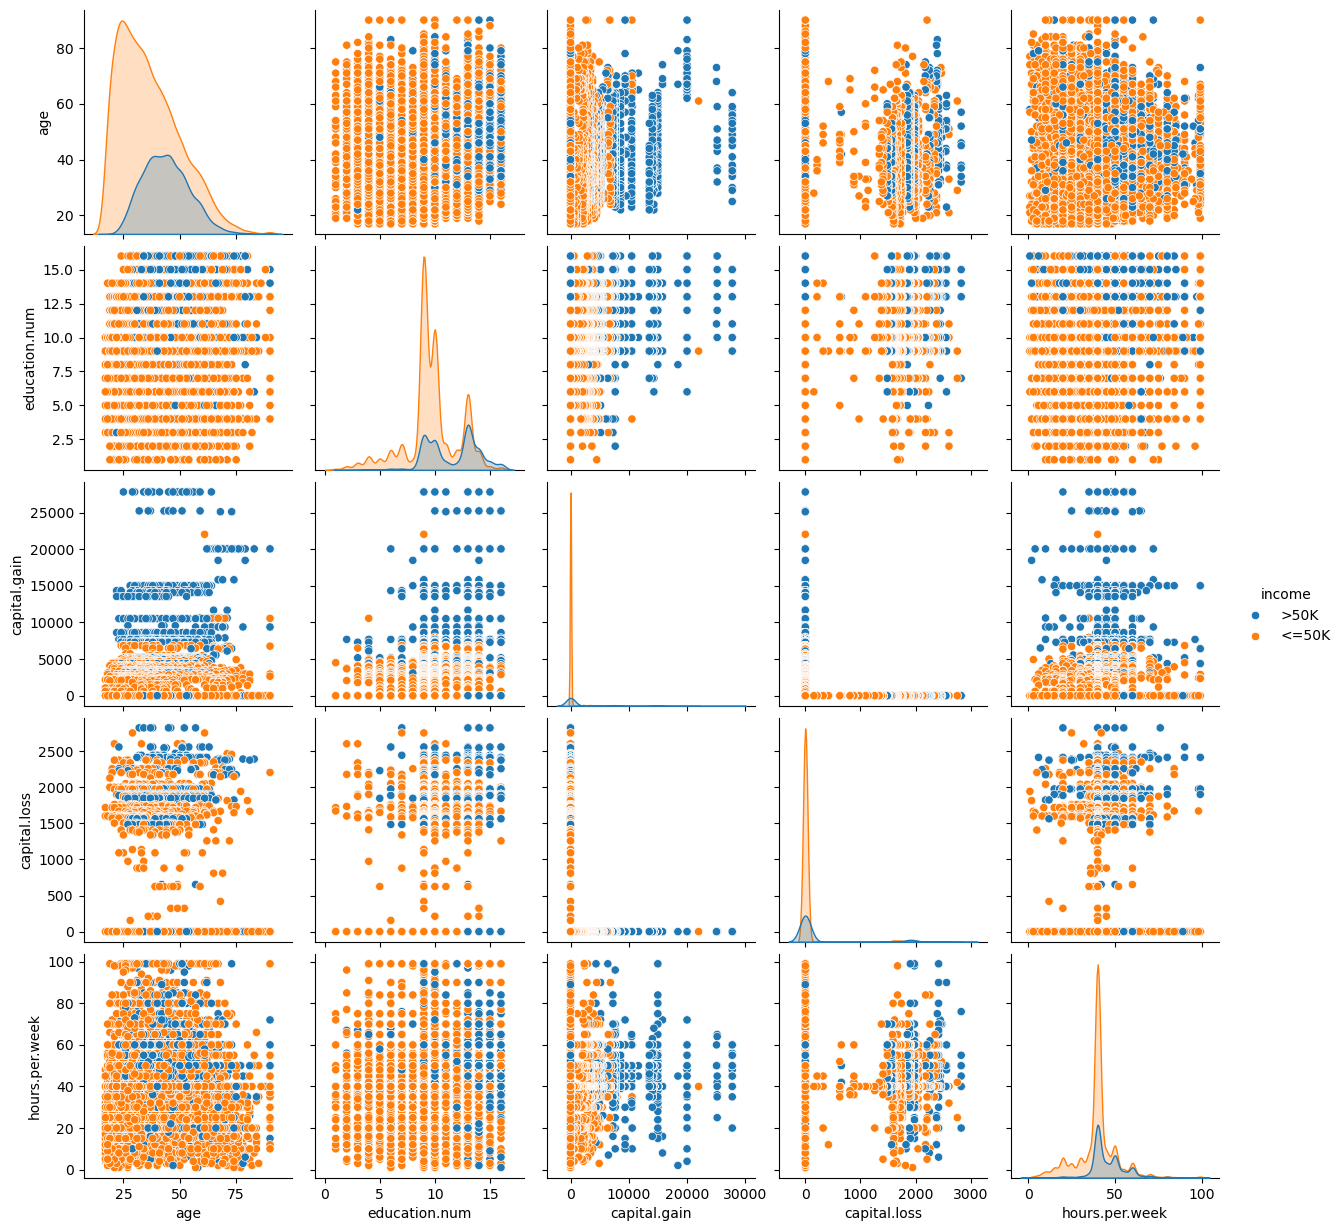

In [26]:
sns.pairplot(df, hue='income')
plt.show()

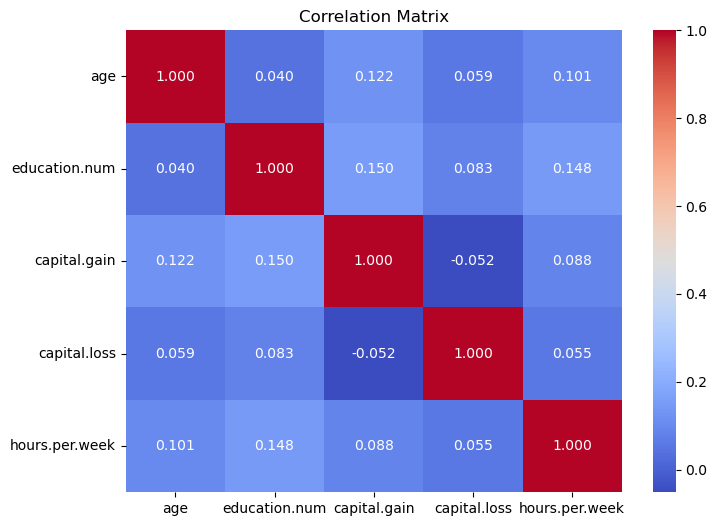

In [27]:
# Plot correlation matrix
plt.figure(figsize=(8, 6))
corr = df[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix')
plt.show()

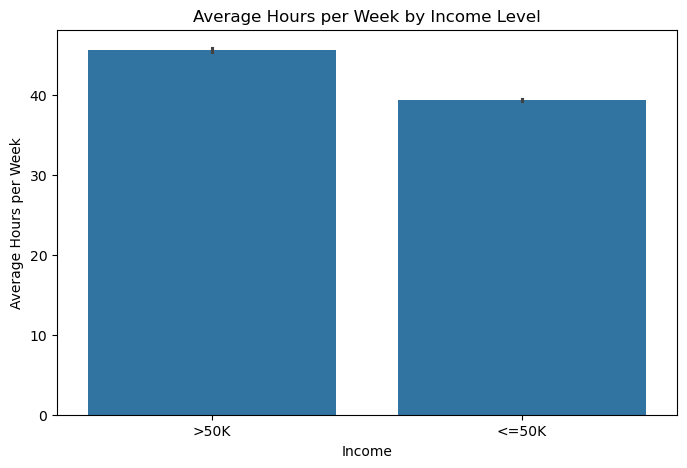

In [28]:
plt.figure(figsize=(8, 5))
sns.barplot(x='income', y='hours.per.week', data=df)
plt.title('Average Hours per Week by Income Level')
plt.xlabel('Income')
plt.ylabel('Average Hours per Week')
plt.show()

<Figure size 1200x700 with 0 Axes>

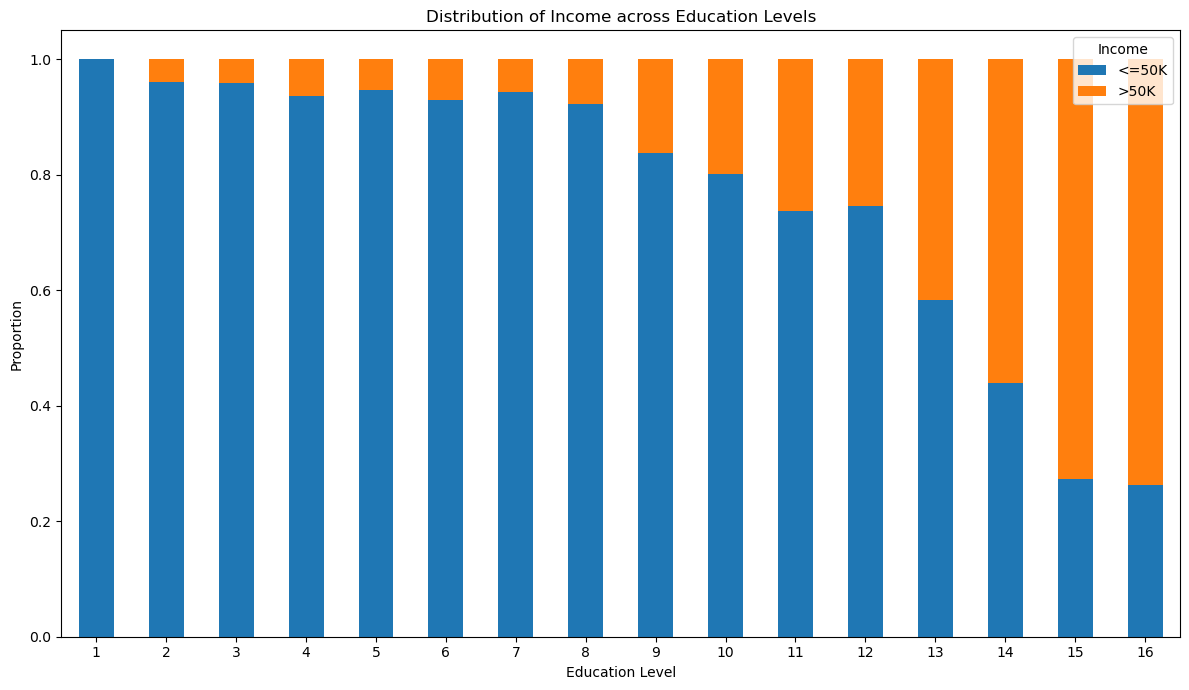

In [29]:
plt.figure(figsize=(12, 7))
education_income = df.groupby('education.num')['income'].value_counts(normalize=True).unstack().fillna(0)
education_income.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Distribution of Income across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

In [32]:
df[["education.num", "education"]].value_counts().reset_index().sort_values(by="education.num")

,education.num,education,count
15,1,Preschool,43
14,2,1st-4th,149
13,3,5th-6th,287
8,4,7th-8th,555
10,5,9th,454
7,6,10th,817
5,7,11th,1048
11,8,12th,377
0,9,HS-grad,9806
1,10,Some-college,6657


In [31]:
category_columns = df.select_dtypes(include='object').columns
(
    df[category_columns].nunique()
    .reset_index(name="Num. Unique Values")
    .rename(columns={'index': 'Category Column'})
)

,Category Column,Num. Unique Values
0,workclass,7
1,education,16
2,marital.status,7
3,occupation,14
4,relationship,6
5,race,5
6,sex,2
7,native.country,41
8,income,2


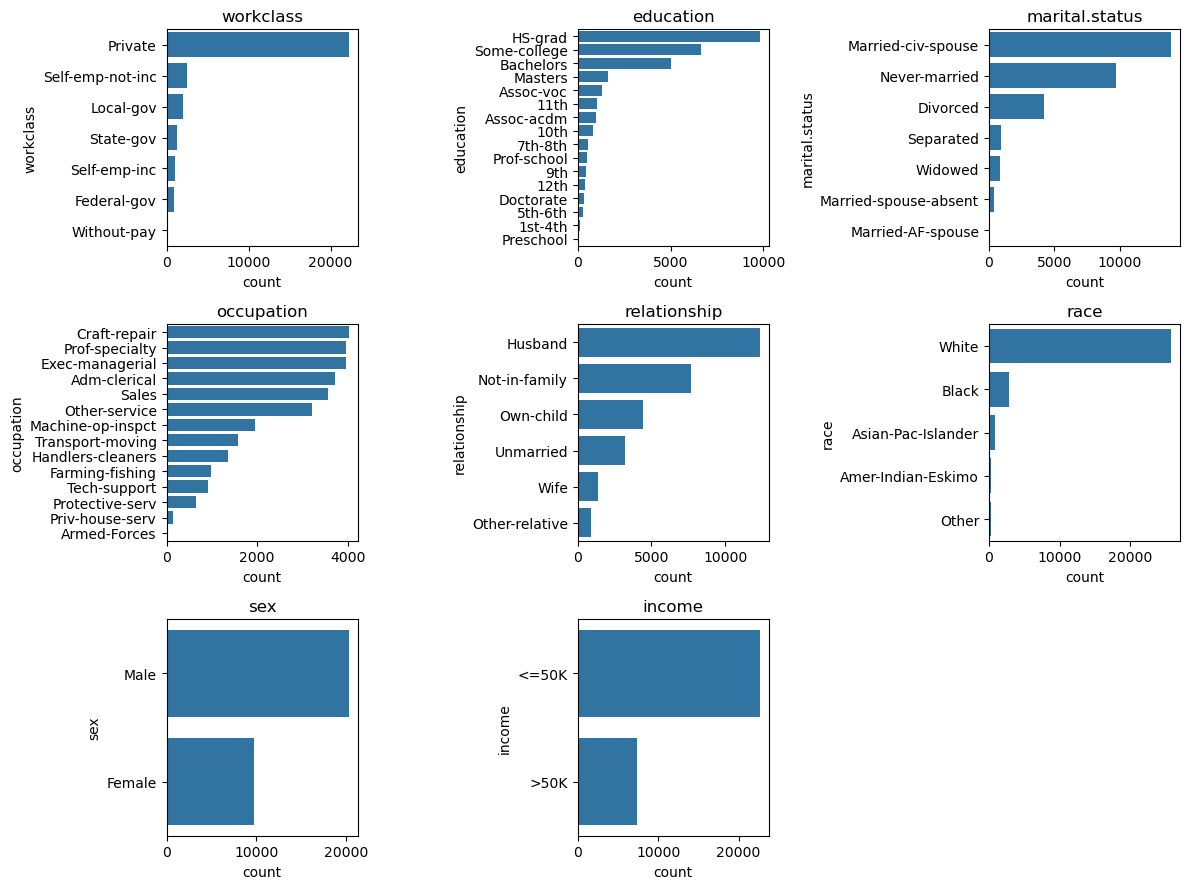

In [34]:
plt.figure(figsize=(12, 9))

for i, col in enumerate(category_columns.drop(labels="native.country")):
    plt.subplot(3, 3, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

plt.show()

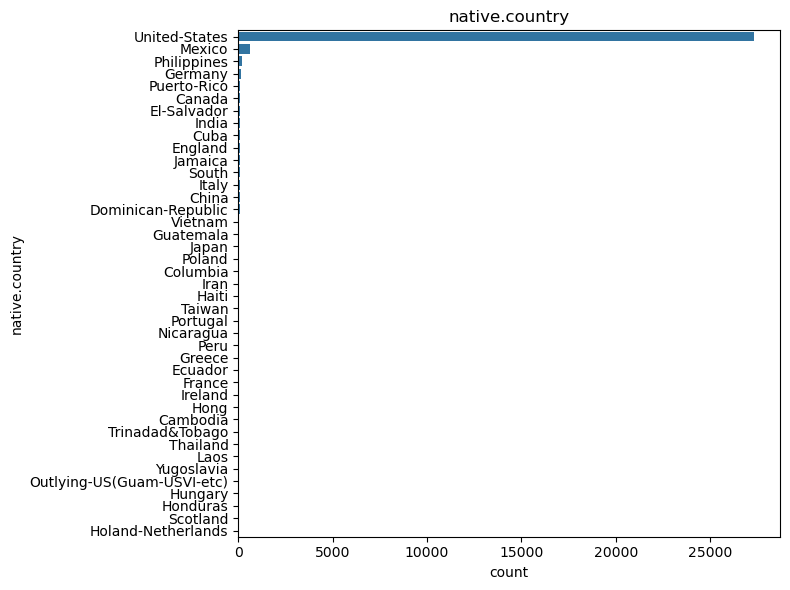

In [36]:
plt.figure(figsize=(8, 6))

sns.countplot(y=df["native.country"], order=df["native.country"].value_counts().index)
plt.title("native.country")
plt.tight_layout()
plt.show()

In [37]:
# Only 1% are not from the US, so we can group all non-US countries into one category
df['native.country'] = df['native.country'].apply(
    lambda x: 'United-States' if x == 'United-States' else 'Non-US'
)
df['native.country'].value_counts()

native.country
United-States    27336
Non-US            2642
Name: count, dtype: int64

In [39]:
df['income'] = df['income'].apply(lambda x: 1 if x == ">50K" else 0)
df['income'].value_counts()

income
0    22622
1     7356
Name: count, dtype: int64

In [40]:
# Save cleaned data
df.to_csv('artifacts/adult_cleaned.csv', index=False)